# Alice HH vs Bob HT

inspired by https://youtu.be/BAiuFOwhAWw

Flip a fair coin 100 times - it gives a sequence of heads (H) and tails (T). For each HH in the sequence of flips, Alice gets a point; for each HT, Bob does, so e.g. for the sequence THHHT Alice gets 2 points and Bob gets 1 point. Who is most likely to win?

In [23]:
import random
import matplotlib.pyplot as plt

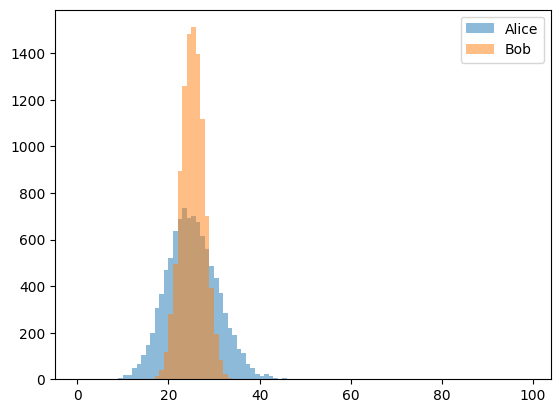

Alice wins: 44.93%
Bob wins: 49.46%
Tie: 5.61%


In [42]:
def flip_coins(n=100):
    last_coin = None
    alice, bob = 0, 0
    for i in range(n):
        coin = random.choice(['H', 'T'])
        if last_coin == 'H':
            if coin == 'H': alice += 1
            else: bob += 1
        last_coin = coin
    return alice, bob

def plot(experiments):
    alices = [a for a, b in experiments]
    bobs = [b for a, b in experiments]
    plt.hist(alices, bins=range(0, 100, 1), alpha=0.5, label='Alice')
    plt.hist(bobs, bins=range(0, 100, 1), alpha=0.5, label='Bob')
    plt.legend()
    plt.show()

def stats(experiments):
    print(f'Alice wins: {sum(a > b for a, b in experiments) / len(experiments) * 100:.2f}%')
    print(f'Bob wins: {sum(b > a for a, b in experiments) / len(experiments) * 100:.2f}%')
    print(f'Tie: {sum(a == b for a, b in experiments) / len(experiments) * 100:.2f}%')

def scope(n_samples=10000):
    experiments = [flip_coins() for _ in range(n_samples)]
    plot(experiments)
    stats(experiments)

scope()

Bob has slightly higher chances of winning

# Does HH takes longer than HT to come up

inspired by https://youtu.be/t8xqMxlZz9Y

While doing coin flips will HH or HT come up first?

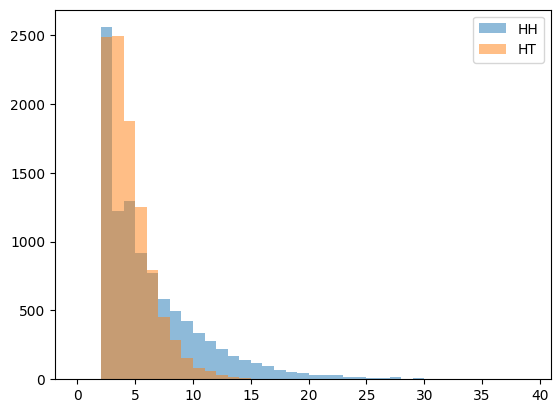

HH occurs after: 5.94 flips
HT occurs after: 4.01 flips


In [47]:
def flip_coins(looking_for):
    last_coin = None
    count = 0
    while True:
        count += 1
        coin = random.choice(['H', 'T'])
        if last_coin == 'H' and coin == looking_for: return count
        last_coin = coin

def plot(HH_lens, HT_lens):
    plt.hist(HH_lens, bins=range(0, 40, 1), alpha=0.5, label='HH')
    plt.hist(HT_lens, bins=range(0, 40, 1), alpha=0.5, label='HT')
    plt.legend()
    plt.show()

def stats(HH_lens, HT_lens):
    print(f'HH occurs after: {sum(HH_lens) / len(HH_lens):.2f} flips')
    print(f'HT occurs after: {sum(HT_lens) / len(HT_lens):.2f} flips')

def scope(n_samples=10000):
    HH_lens = [flip_coins('H') for _ in range(n_samples)]
    HT_lens = [flip_coins('T') for _ in range(n_samples)]
    plot(HH_lens, HT_lens)
    stats(HH_lens, HT_lens)

scope()